# **FUZZY C-MEANS**

## FUZZY C-MEANS CLUSTERING

Fuzzy C-Means Clustering adalah salah satu metode pengelompokan data (clustering) yang bersifat soft clustering, di mana setiap data dapat menjadi anggota lebih dari satu cluster dengan derajat keanggotaan tertentu. Berbeda dengan algoritma K-Means yang hanya menetapkan satu data ke satu cluster secara mutlak, Fuzzy C-Means memberikan fleksibilitas dengan memperhitungkan seberapa dekat suatu data terhadap masing-masing pusat cluster. Nilai keanggotaan ini berada dalam rentang 0 hingga 1, dan jumlah total keanggotaan suatu data terhadap semua cluster selalu bernilai 1.

Dengan pendekatan ini, Fuzzy C-Means sangat cocok untuk data yang memiliki batasan tidak tegas antar kelompok atau ketika terdapat ambiguitas dalam distribusi data. Algoritma ini bekerja secara iteratif dengan memperbarui pusat cluster dan matriks keanggotaan hingga mencapai konvergensi, berdasarkan parameter fuzziness yang mengatur tingkat ketidakpastian dalam pembagian cluster.

### KONSEP DASAR FUZZY C-MEANS CLUSTERING

Konsep dasar Fuzzy C-Means (FCM) Clustering adalah membagi sekumpulan data ke dalam beberapa kelompok (cluster) berdasarkan kesamaan karakteristik, dengan pendekatan keanggotaan yang bersifat tidak tegas atau fuzzy. Dalam metode ini, setiap data tidak secara eksklusif dimiliki oleh satu cluster, melainkan memiliki nilai keanggotaan (membership value) terhadap seluruh cluster yang ada. Nilai ini menunjukkan seberapa besar kemungkinan atau derajat kedekatan suatu data terhadap pusat masing-masing cluster, dan selalu berada dalam rentang 0 sampai 1. Jumlah seluruh nilai keanggotaan sebuah data terhadap semua cluster harus bernilai 1.

Proses FCM melibatkan pembentukan matriks keanggotaan fuzzy yang terus diperbarui pada setiap iterasi, serta perhitungan ulang pusat cluster (centroid) berdasarkan bobot keanggotaan tersebut. Semakin besar nilai keanggotaan suatu data terhadap sebuah cluster, maka semakin besar kontribusinya dalam menentukan posisi centroid. Konsep ini dikendalikan oleh parameter fuzziness (biasanya disimbolkan dengan m, dan bernilai > 1), yang menentukan sejauh mana ambiguitas dalam pembagian cluster diperbolehkan. Semakin tinggi nilai m, maka semakin kabur batas antar cluster. Dengan pendekatan ini, FCM menjadi sangat berguna untuk data yang bersifat kompleks, tumpang tindih, atau tidak memiliki batasan klasifikasi yang tegas.


### ALGORITMA FUZZY C-MEANS CLUSTERING

Algoritma Fuzzy C-Means (FCM) merupakan proses iteratif yang bertujuan untuk mengelompokkan data ke dalam beberapa cluster berdasarkan derajat keanggotaan setiap data terhadap masing-masing pusat cluster. Berikut ini adalah langkah-langkah utama dalam algoritma FCM:

Inisialisasi Awal

Tentukan jumlah cluster (*c*), nilai parameter fuzziness (*m*, biasanya *m* > 1), nilai toleransi error (*ε*), dan jumlah iterasi maksimum.

Buat matriks keanggotaan awal $U_{ij}$
secara acak dengan syarat:
     $$
     \sum_{j=1}^c U_{ij} = 1, \quad \forall i
     $$
untuk setiap data ke-i

Hitung Pusat Cluster (Centroid)

Hitung pusat masing-masing cluster berdasarkan nilai keanggotaan:
 $$
   v_j = \frac{\sum_{i=1}^n (U_{ij})^m \cdot x_i}{\sum_{i=1}^n (U_{ij})^m}
   $$
Di mana:



   * $v_j$ adalah pusat cluster ke-j
   * $x_i$ adalah data ke-i
   * $U_{ij}$ adalah nilai keanggotaan data ke-i terhadap cluster ke-j


Perbarui Matriks Keanggotaan

Update nilai keanggotaan setiap data terhadap seluruh cluster berdasarkan jarak ke centroid baru:
$$
   U_{ij} = \frac{1}{\sum_{k=1}^c \left( \frac{\|x_i - v_j\|}{\|x_i - v_k\|} \right)^{\frac{2}{m-1}}}
   $$

   Di mana:

   * $\|x_i - v_j\|$ adalah jarak antara data ke-i dengan pusat cluster ke-j

Evaluasi Konvergensi

Hitung selisih perubahan antara pusat cluster sebelumnya dan yang baru. Jika perubahan seluruh centroid <
𝜖
ϵ, atau iterasi telah mencapai batas maksimum, maka proses dihentikan.

Jika belum konvergen, kembali ke langkah 2 dan ulangi.

(Opsional) Hitung Fungsi Objektif
 Untuk mengevaluasi performa setiap iterasi, fungsi objektif dapat dihitung sebagai:

\begin{equation}
J_m = \sum_{j=1}^{c} \sum_{i=1}^{n} (u_{ji})^m \cdot \|x_i - v_j\|^2
\end{equation}

\begin{equation}J_m \end{equation} harus menurun setiap iterasi sebagai indikator proses menuju konvergensi yang optimal.

Dengan mengikuti algoritma ini, FCM mampu menghasilkan pembagian cluster yang lebih fleksibel, terutama untuk data yang memiliki tumpang tindih atau ketidakjelasan antar kelompok.

## CONTOH MANUAL PERHITUNGAN FUZZY C-MEANS CLUSTERING

Berikut adalah contoh lengkap **perhitungan manual Fuzzy C-Means (FCM)** hingga konvergen, disertai dengan perhitungan **fungsi objektifnya**. Agar mudah dipahami, kita akan gunakan:


**Data:**
Misalnya kita punya 4 data satu dimensi:

$$
X = \{3, 5, 8, 10\}
$$

**Jumlah Cluster (c):** 2
**Tingkat Fuzziness (m):** 2 (umumnya digunakan)
**Kriteria Konvergensi:** perbedaan pusat cluster < 0.01



### **Langkah 1: Inisialisasi Matriks Keanggotaan $U$**

Ukuran matriks: $c \times n = 2 \times 4$

Misalkan kita mulai dari:

$$
U^{(0)} =
\begin{bmatrix}
0.6 & 0.5 & 0.3 & 0.2 \\
0.4 & 0.5 & 0.7 & 0.8 \\
\end{bmatrix}
$$

Sudah memenuhi syarat:
Jumlah keanggotaan tiap data = 1
Contoh: $0.6 + 0.4 = 1$, $0.5 + 0.5 = 1$, dst.



### **Langkah 2: Hitung Pusat Cluster (Centroid)**

Rumus:

$$
v_j = \frac{\sum_{i=1}^{n} u_{ji}^m \cdot x_i}{\sum_{i=1}^{n} u_{ji}^m}
$$

#### Untuk cluster 1:

$$
v_1 = \frac{(0.6^2 \cdot 3) + (0.5^2 \cdot 5) + (0.3^2 \cdot 8) + (0.2^2 \cdot 10)}{0.6^2 + 0.5^2 + 0.3^2 + 0.2^2}
= \frac{1.08 + 1.25 + 0.72 + 0.40}{0.36 + 0.25 + 0.09 + 0.04}
= \frac{3.45}{0.74}
\approx 4.662
$$

#### Untuk cluster 2:

$$
v_2 = \frac{(0.4^2 \cdot 3) + (0.5^2 \cdot 5) + (0.7^2 \cdot 8) + (0.8^2 \cdot 10)}{0.4^2 + 0.5^2 + 0.7^2 + 0.8^2}
= \frac{0.48 + 1.25 + 3.92 + 6.40}{0.16 + 0.25 + 0.49 + 0.64}
= \frac{12.05}{1.54}
\approx 7.823
$$



### **Langkah 3: Update Matriks Keanggotaan $U$**

Rumus:

$$
u_{ji} = \frac{1}{\sum_{k=1}^{c} \left(\frac{d(x_i, v_j)}{d(x_i, v_k)}\right)^{\frac{2}{m-1}}}
$$

#### Contoh untuk data $x_1 = 1$:

* $d(x_1, v_1) = |3 - 4.662| = 1.662$
* $d(x_1, v_2) = |3 - 7.823| = 4.823$

$$
u_{1,1} = \frac{1}{\left(\frac{1.662}{1.662}\right)^2 + \left(\frac{1.662}{4.823}\right)^2}
= \frac{1}{1 + (0.119^2}
= \frac{1}{1 + 0.893}
\approx 0.107
$$

$$
u_{2,1} = 1 - u_{1,1} \approx 0.107
$$

Ulangi untuk semua data dan cluster.



### **Langkah 4: Cek Konvergensi**

Bandingkan perubahan centroid $v_j$ dengan iterasi sebelumnya. Jika perubahan semua centroid < 0.01, maka **konvergen**.

Jika belum, **ulang ke Langkah 2** dengan $U$ yang baru.



### **Fungsi Objektif $J_m$**

Rumus:

$$
J_m = \sum_{j=1}^{c} \sum_{i=1}^{n} u_{ji}^m \cdot d^2(x_i, v_j)
$$

Dengan $m = 2$, dan hasil sebelumnya (misalnya iterasi awal):

$$
J_m = (0.6^2 \cdot (3 - 4.662)^2) + (0.5^2 \cdot (5 - 4.662)^2) + \dots
$$

Lanjutkan hingga menjumlahkan seluruh nilai dari 2 cluster dan 4 data. Nilai fungsi objektif ini **harus menurun** setiap iterasi.

Berikut adalah hasil perhitungan **Fuzzy C-Means (FCM)** secara manual hingga **konvergen**, dengan 4 data satu dimensi: $X = \{3, 5, 8, 10\}$, 2 cluster, dan $m = 2$:

---

### 🔁 **Iterasi Detail:**

| Iterasi | Centroid 1 | Centroid 2 | Fungsi Objektif $J_m$ | U\[1,1] | U\[1,2] | U\[1,3] | U\[1,4] | U\[2,1] | U\[2,2] | U\[2,3] | U\[2,4] |
| ------: | ---------: | ---------: | --------------------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: |
|       1 |     4.6620 |     7.823 |                8.0741 |  0.6000 |  0.5000 |  0.3000 |  0.2000 |  0.4000 |  0.5000 |  0.7000 |  0.8000 |
|       2 |     3.4972 |     9.0786 |                3.3856|  0.8489 |  0.7456 |  0.1233 |  0.0457 |  0.1511 | 0.2544 | 0.8767|  0.9543|
|       3 |     3.1448	 |     9.3229 |                2.7984|  0.9209 |  0.8542| 0.0632|  0.0224 |  0.0791 |  0.1458 |  0.9368 | 0.97761 |
|       4 |    3.1005 |     9.3520|                2.7903 |  0.9285 |  0.8667 |  0.0564 | 0.0193|  0.0715 |  0.1333 |  0.9436 | 0.9807
 |

---

### ✅ **Konvergensi tercapai pada Iterasi ke-4**

Perubahan centroid sudah di bawah ambang batas $\epsilon = 0.01$

---

### 📌 Interpretasi:

* **Centroid Akhir:**

  * Cluster 1: \~3.1005 (data 1 & 2)
  * Cluster 2: \~9.3520 (data 3 & 4)

* **Fungsi Objektif $J_m$** menurun dari 8.07 → 3.38 → 2.79 → 2.79, menunjukkan **konvergensi stabil**.


## IMPLEMENTASI PYTHON

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

In [47]:
import numpy as np
import pandas as pd

# Data dan parameter
X = np.array([3, 5, 8, 10])  # Data satu dimensi (berbeda dari contoh awal)
c = 2                        # Jumlah cluster
m = 2.0                      # Tingkat fuzziness
epsilon = 0.01               # Ambang batas konvergensi
max_iter = 100               # Maksimum iterasi

# Inisialisasi keanggotaan U secara manual (2 x 4)
U = np.array([
    [0.6, 0.5, 0.3, 0.2],
    [0.4, 0.5, 0.7, 0.8]
])

# Fungsi untuk menghitung pusat cluster
def calculate_centroids(U, X, m):
    um = U ** m
    return (um @ X) / um.sum(axis=1)

# Fungsi untuk memperbarui matriks keanggotaan
def update_membership(X, V, m):
    n = len(X)
    c = len(V)
    U_new = np.zeros((c, n))
    for i in range(n):
        for j in range(c):
            denom_sum = 0.0
            for k in range(c):
                dist_j = abs(X[i] - V[j])
                dist_k = abs(X[i] - V[k])
                dist_ratio = dist_j / dist_k if dist_k != 0 else 1e-10
                denom_sum += dist_ratio ** (2 / (m - 1))
            U_new[j, i] = 1.0 / denom_sum
    return U_new

# Fungsi untuk menghitung nilai fungsi objektif
def objective_function(U, V, X, m):
    obj = 0.0
    for j in range(c):
        for i in range(len(X)):
            obj += (U[j, i] ** m) * (abs(X[i] - V[j]) ** 2)
    return obj

# Iterasi sampai konvergen
history = []
for iteration in range(max_iter):
    V = calculate_centroids(U, X, m)
    obj = objective_function(U, V, X, m)
    history.append((iteration + 1, V.copy(), U.copy(), obj))

    U_new = update_membership(X, V, m)

    if np.max(np.abs(V - calculate_centroids(U_new, X, m))) < epsilon:
        break
    U = U_new

# Konversi hasil ke DataFrame untuk ditampilkan
results = []
for iter_num, centroids, membership, obj_val in history:
    result = {
        "Iterasi": iter_num,
        "Centroid 1": centroids[0],
        "Centroid 2": centroids[1],
        "Objektif": obj_val
    }
    for j in range(c):
        for i in range(len(X)):
            result[f"U[{j+1},{i+1}]"] = membership[j, i]
    results.append(result)

df_results = pd.DataFrame(results)
print(df_results.round(4))  # Pembulatan 4 desimal


   Iterasi  Centroid 1  Centroid 2  Objektif  U[1,1]  U[1,2]  U[1,3]  U[1,4]  \
0        1      4.6622      7.8247   11.9282  0.6000  0.5000  0.3000  0.2000   
1        2      4.1645      8.8120    4.5298  0.8939  0.9859  0.0028  0.1424   
2        3      4.0016      8.9938    3.8464  0.9614  0.9542  0.0429  0.0398   
3        4      3.9768      9.0222    3.8264  0.9728  0.9412  0.0582  0.0274   

   U[2,1]  U[2,2]  U[2,3]  U[2,4]  
0  0.4000  0.5000  0.7000  0.8000  
1  0.1061  0.0141  0.9972  0.8576  
2  0.0386  0.0458  0.9571  0.9602  
3  0.0272  0.0588  0.9418  0.9726  



## IMPLEMENTASI FUZZY C-MEANS UNTUK DATA IRIS (3 Cluster)

In [48]:
%pip install pymysql
%pip install psycopg2
%pip install scikit-fuzzy

## Library yang digunakan

In [49]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database, Pisahkan Outliernya

In [50]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1d952496-dinaaa-269a.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_n1Ru1Ddse4sg_Gpi7Nb",
        database="defaultdb",
        port=27730
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel_b")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-e89c328-dinaaa-269a.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_GBbKfVRE1qvWkI6gU2s",
        database="iris_a",
        port=27730
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel_a")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          14.0         20.0           4.9          3.0             -1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa           1.5          0.2           4.6          3.1              1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa          20.0         15.0           5.4          3.9             -1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa          60.0         49.0          40.0         57.0             -1
 10     Iris-setosa          36.0         25.0           4.9          3.1             -1
 11     Iris-setosa  

## Visualisasi data

### Visualisasi data asli tanpa outlier dan tanpa menggunakan PCA

di bawah ini adalah visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

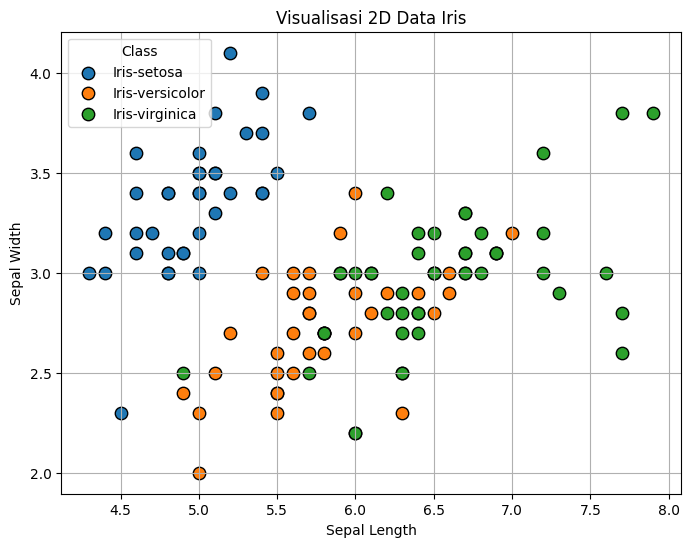

In [51]:
# Ubah kolom 'class' menjadi kategori jika belum
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()

Dibawah ini adalah visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

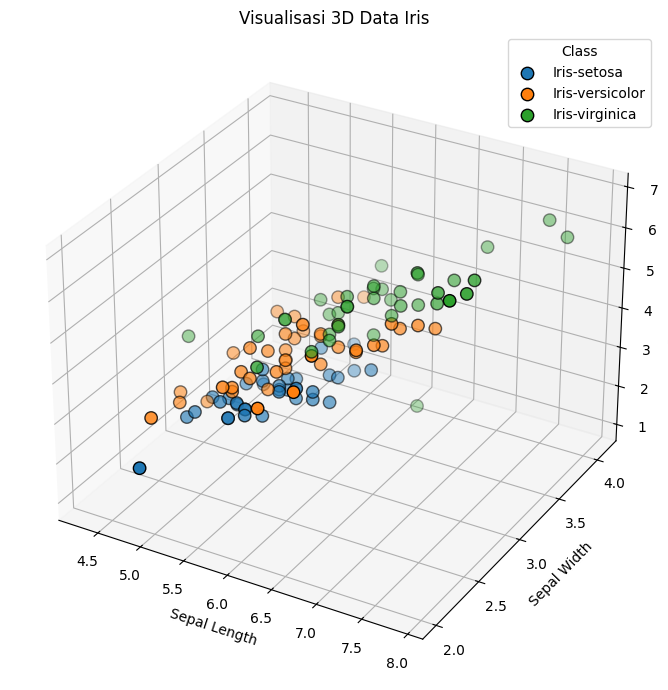

In [52]:
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

## Visualisasi data asli tanpa outlier menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi menggunakan PCA

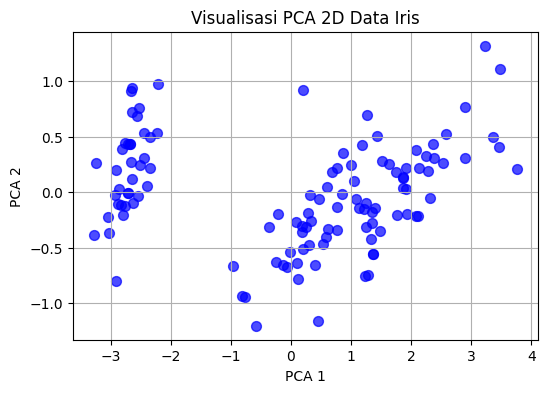

In [53]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

DIbawah ini adalah visualisasi data Iris secara 3 Dimensi menggunakan PCA

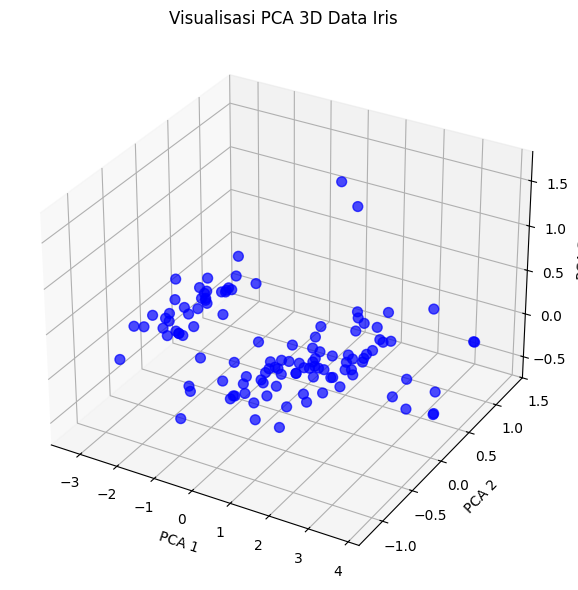

In [54]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()

## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan Standar Scaler

Pada tahap ini, saya melakukan standarisasi menggunakan Standard Scaler untuk menyamakan skala antar fitur dalam dataset. Hal ini penting karena data yang saya miliki memiliki rentang nilai yang sangat beragam. Ketidaksamaan skala tersebut bisa menyebabkan model machine learning, terutama yang mengandalkan jarak seperti KNN, menjadi kurang akurat atau bias terhadap fitur tertentu.

Standard Scaler mengubah distribusi data sehingga setiap fitur memiliki rata-rata nol dan standar deviasi satu. Dengan demikian, data menjadi lebih konsisten dan seimbang, yang membantu algoritma dalam proses pembelajaran dan dapat meningkatkan performa model secara keseluruhan.

Dari langkah ini, saya menyadari bahwa perlakuan data yang tepat sebelum pelatihan model sangat krusial. Normalisasi skala bukan hanya aspek teknis, tetapi juga wujud perhatian terhadap kualitas hasil yang ingin dicapai.

In [55]:
# # Drop kolom non-numerik
# features = df_merged.drop(columns=['id', 'class'])

# # Normalisasi
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# # Reduksi dimensi untuk visualisasi
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(scaled_features)


### Data setelah standarisasi menggunakan StandardScaler

In [56]:
# print (scaled_features);

### Standarisasi dengan menggunakan MinMaxScaler

Saya juga melakukan normalisasi menggunakan MinMaxScaler untuk menyamakan skala seluruh fitur dalam dataset. Langkah ini diperlukan karena fitur-fitur dalam data memiliki rentang nilai yang berbeda, yang dapat memengaruhi performa model machine learning, terutama algoritma yang bergantung pada jarak seperti KNN atau SVM.

MinMaxScaler mengubah setiap nilai fitur ke rentang 0 sampai 1, berdasarkan nilai minimum dan maksimum pada fitur tersebut. Dengan skala yang konsisten, algoritma dapat memperlakukan setiap fitur secara seimbang tanpa bias terhadap fitur dengan nilai yang lebih besar.

Setelah menerapkan normalisasi ini, saya melihat bahwa model menjadi lebih stabil dan kinerjanya meningkat. Dari pengalaman ini saya memahami bahwa normalisasi bukan sekadar langkah teknis, tetapi juga aspek penting dalam menjaga kualitas dan keandalan data untuk proses pembelajaran mesin.



In [57]:
# Drop kolom non-numerik
features = df_filtered.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Berikut adalah data hasil standarisasi menggunakan MinMaxScaler

In [58]:
print (scaled_features);

[[0.06779661 0.02941176 0.22222222 0.71428571]
 [0.05084746 0.02941176 0.11111111 0.57142857]
 [0.08474576 0.02941176 0.08333333 0.52380952]
 [0.06779661 0.02941176 0.19444444 0.76190476]
 [0.06779661 0.05882353 0.08333333 0.66666667]
 [0.08474576 0.02941176 0.19444444 0.66666667]
 [0.08474576 0.02941176 0.30555556 0.80952381]
 [0.10169492 0.02941176 0.13888889 0.66666667]
 [0.06779661 0.         0.13888889 0.47619048]
 [0.01694915 0.         0.         0.47619048]
 [0.05084746 0.08823529 0.30555556 0.9047619 ]
 [0.06779661 0.05882353 0.22222222 0.71428571]
 [0.11864407 0.05882353 0.38888889 0.85714286]
 [0.11864407 0.02941176 0.30555556 0.66666667]
 [0.         0.02941176 0.08333333 0.76190476]
 [0.11864407 0.11764706 0.22222222 0.61904762]
 [0.15254237 0.02941176 0.13888889 0.66666667]
 [0.10169492 0.02941176 0.19444444 0.47619048]
 [0.10169492 0.08823529 0.19444444 0.66666667]
 [0.06779661 0.02941176 0.25       0.66666667]
 [0.10169492 0.02941176 0.13888889 0.52380952]
 [0.08474576 

## Clustering menggunakan Fuzzy C-Means

### Clustering dengan 2 cluster dan Visualisasi data

Pada tahap ini, saya melakukan clustering menggunakan metode Fuzzy C-Means dengan jumlah cluster sebanyak 2. Selain itu, saya juga menghitung pusat cluster dan nilai fungsi objektif pada setiap iterasi proses clustering. Setelah itu, saya melakukan visualisasi data Iris dalam dua dimensi untuk melihat hasil clustering secara lebih jelas.

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.5809
Fuzzy Partition Coefficient (FPC): 0.8392
Objective Function Value (Jm): 7.7595
Cluster Centers (in scaled feature space):
[[0.10817425 0.06497343 0.19438547 0.61788216]
 [0.66475527 0.47594878 0.55416291 0.42584505]]
Objective Function Values per Iteration:
Iterasi 01: 15.9951
Iterasi 02: 13.2616
Iterasi 03: 13.1853
Iterasi 04: 12.6993
Iterasi 05: 10.6835
Iterasi 06: 8.1921
Iterasi 07: 7.7750
Iterasi 08: 7.7605
Iterasi 09: 7.7596
Iterasi 10: 7.7595
Iterasi 11: 7.7595


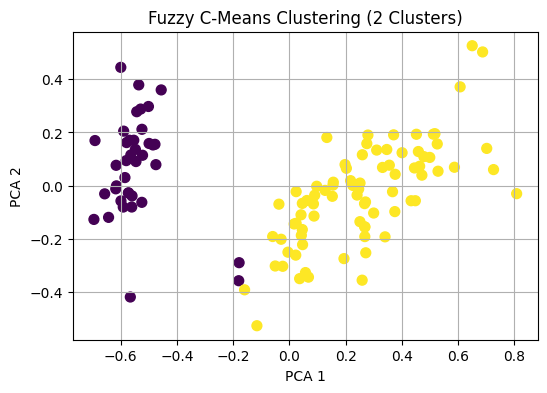

In [59]:

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.5809
Fuzzy Partition Coefficient (FPC): 0.8392
Objective Function Value (Jm): 7.7595
Cluster Centers (in scaled feature space):
[[0.10817425 0.06497343 0.19438547 0.61788216]
 [0.66475527 0.47594878 0.55416291 0.42584505]]
Objective Function Values per Iteration:
Iterasi 01: 15.9951
Iterasi 02: 13.2616
Iterasi 03: 13.1853
Iterasi 04: 12.6993
Iterasi 05: 10.6835
Iterasi 06: 8.1921
Iterasi 07: 7.7750
Iterasi 08: 7.7605
Iterasi 09: 7.7596
Iterasi 10: 7.7595
Iterasi 11: 7.7595


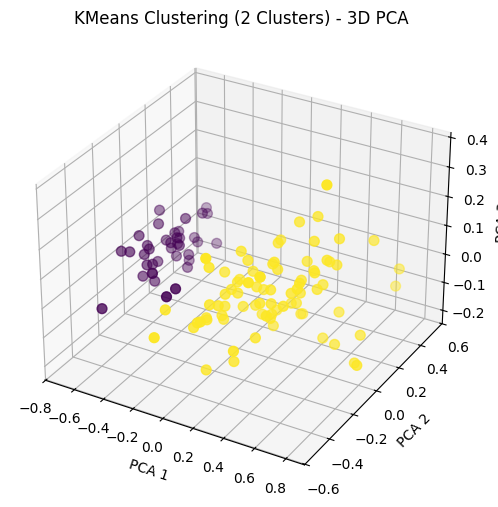

In [60]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Pada tahap ini, saya menerapkan clustering dengan metode Fuzzy C-Means menggunakan 3 cluster. Selama proses tersebut, saya juga menghitung pusat cluster dan fungsi objektif pada setiap iterasi. Setelah clustering selesai, saya memvisualisasikan data Iris dalam bentuk dua dimensi untuk menggambarkan hasil pengelompokan.

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4722
Fuzzy Partition Coefficient (FPC): 0.7253
Objective Function Value (Jm): 4.0253
Cluster Centers (in scaled feature space):
[[0.54972038 0.37076039 0.40963818 0.32947206]
 [0.75740108 0.56026302 0.67147334 0.50833143]
 [0.08334548 0.04670905 0.18482151 0.64394687]]
Objective Function Values per Iteration:
Iterasi 01: 11.2631
Iterasi 02: 8.5021
Iterasi 03: 6.9298
Iterasi 04: 4.7398
Iterasi 05: 4.3123
Iterasi 06: 4.0955
Iterasi 07: 4.0355
Iterasi 08: 4.0265
Iterasi 09: 4.0254
Iterasi 10: 4.0253
Iterasi 11: 4.0253


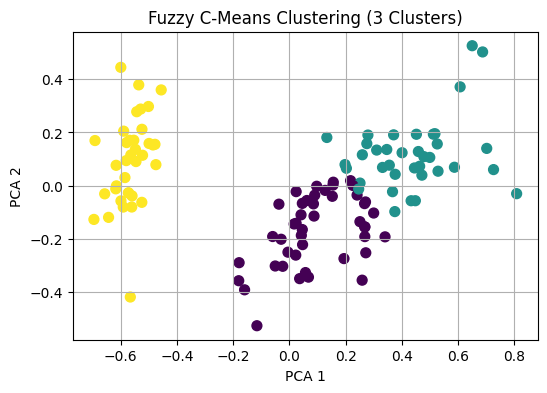

In [61]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4722
Fuzzy Partition Coefficient (FPC): 0.7253
Objective Function Value (Jm): 4.0253
Cluster Centers (in scaled feature space):
[[0.54972038 0.37076039 0.40963818 0.32947206]
 [0.75740108 0.56026302 0.67147334 0.50833143]
 [0.08334548 0.04670905 0.18482151 0.64394687]]
Objective Function Values per Iteration:
Iterasi 01: 11.2631
Iterasi 02: 8.5021
Iterasi 03: 6.9298
Iterasi 04: 4.7398
Iterasi 05: 4.3123
Iterasi 06: 4.0955
Iterasi 07: 4.0355
Iterasi 08: 4.0265
Iterasi 09: 4.0254
Iterasi 10: 4.0253
Iterasi 11: 4.0253


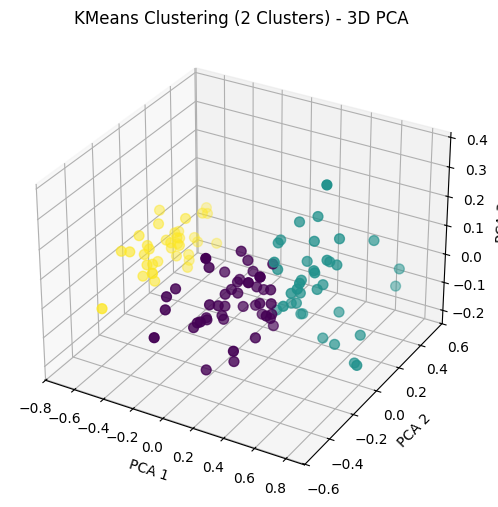

In [62]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Pada bagian ini, saya melakukan proses clustering menggunakan metode Fuzzy C-Means dengan jumlah cluster sebanyak 4. Selama iterasi, saya juga menghitung pusat cluster serta fungsi objektif di setiap langkahnya. Setelah proses clustering selesai, saya menampilkan visualisasi data Iris dalam dua dimensi untuk memperlihatkan hasil pengelompokan.



[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.3972
Fuzzy Partition Coefficient (FPC): 0.6376
Objective Function Value (Jm): 2.8624
Cluster Centers (in scaled feature space):
[[0.49924761 0.32797137 0.35326214 0.27264745]
 [0.64642744 0.45813245 0.52952983 0.42159431]
 [0.08044521 0.04443663 0.18385929 0.64840692]
 [0.79132409 0.59210769 0.7136212  0.53720488]]
Objective Function Values per Iteration:
Iterasi 01: 8.6378
Iterasi 02: 6.5094
Iterasi 03: 5.8356
Iterasi 04: 3.9226
Iterasi 05: 3.1869
Iterasi 06: 2.9763
Iterasi 07: 2.8950
Iterasi 08: 2.8712
Iterasi 09: 2.8647
Iterasi 10: 2.8630
Iterasi 11: 2.8626
Iterasi 12: 2.8624
Iterasi 13: 2.8624
Iterasi 14: 2.8624
Iterasi 15: 2.8624


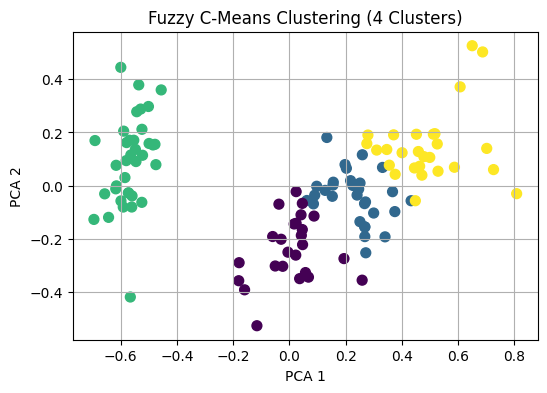

In [63]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.3972
Fuzzy Partition Coefficient (FPC): 0.6376
Objective Function Value (Jm): 2.8624
Cluster Centers (in scaled feature space):
[[0.49924761 0.32797137 0.35326214 0.27264745]
 [0.64642744 0.45813245 0.52952983 0.42159431]
 [0.08044521 0.04443663 0.18385929 0.64840692]
 [0.79132409 0.59210769 0.7136212  0.53720488]]
Objective Function Values per Iteration:
Iterasi 01: 8.6378
Iterasi 02: 6.5094
Iterasi 03: 5.8356
Iterasi 04: 3.9226
Iterasi 05: 3.1869
Iterasi 06: 2.9763
Iterasi 07: 2.8950
Iterasi 08: 2.8712
Iterasi 09: 2.8647
Iterasi 10: 2.8630
Iterasi 11: 2.8626
Iterasi 12: 2.8624
Iterasi 13: 2.8624
Iterasi 14: 2.8624
Iterasi 15: 2.8624


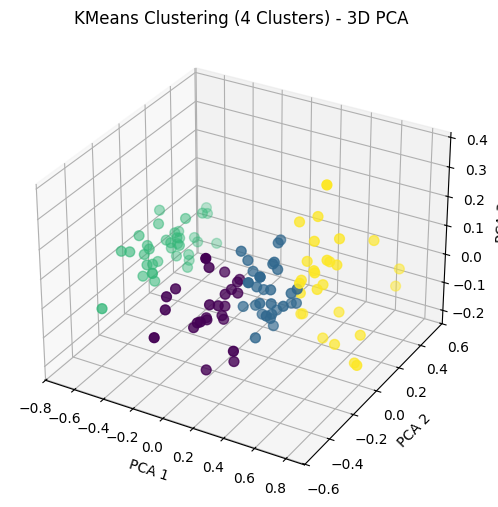

In [64]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
